In [1]:
%matplotlib ipympl

In [2]:
import ovro_lwa_portal
import bdsf

In [5]:
ds = ovro_lwa_portal.open_dataset("https://caltech1.osn.mghpcc.org/10.25800/test2.zarr", production=False, storage_options={"key": "F2PFTTQE94RPQ1DUP0ZA", "secret": "r84Dq2hrf5TDTqk60TrL3medNdwHz5kFVUANFrS1"})

/Users/claw/anaconda3arm/envs/py312/lib/python3.12/site-packages/botocore/auth.py:422: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  datetime_now = datetime.datetime.utcnow()
/Users/claw/anaconda3arm/envs/py312/lib/python3.12/site-packages/botocore/auth.py:422: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  datetime_now = datetime.datetime.utcnow()
/Users/claw/anaconda3arm/envs/py312/lib/python3.12/site-packages/botocore/auth.py:422: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  datetime_now = datetime.datetime.utcnow(

In [6]:
ds

<xarray.Dataset> Size: 10GB
Dimensions:          (time: 10, frequency: 15, polarization: 1, beam_param: 3,
                      l: 4096, m: 4096)
Coordinates:
  * time             (time) float64 80B 6.066e+04 6.066e+04 ... 6.066e+04
  * frequency        (frequency) float64 120B 2.028e+07 2.487e+07 ... 8.459e+07
  * polarization     (polarization) <U1 4B 'I'
  * beam_param       (beam_param) <U5 60B 'major' 'minor' 'pa'
  * l                (l) float64 33kB 1.117 1.116 1.116 ... -1.115 -1.116 -1.116
  * m                (m) float64 33kB -1.117 -1.116 -1.116 ... 1.115 1.116 1.116
    declination      (m, l) float64 134MB dask.array<chunksize=(128, 128), meta=np.ndarray>
    right_ascension  (m, l) float64 134MB dask.array<chunksize=(128, 128), meta=np.ndarray>
    velocity         (frequency) float64 120B dask.array<chunksize=(1,), meta=np.ndarray>
Data variables:
    BEAM             (time, frequency, polarization, beam_param) float64 4kB dask.array<chunksize=(1, 1, 1, 3), meta=np.ndarray>
    SKY              (time, frequency, polarization, l, m) float32 10GB dask.array<chunksize=(1, 1, 1, 128, 128), meta=np.ndarray>
    wcs_header_str   (frequency) |S2880 43kB dask.array<chunksize=(15,), meta=np.ndarray>

In [7]:
ds.radport.plot_cutout?

Signature:
ds.radport.plot_cutout(
    l_center: 'float',
    m_center: 'float',
    dl: 'float',
    dm: 'float',
    var: "Literal['SKY', 'BEAM']" = 'SKY',
    time_idx: 'int | None' = None,
    freq_idx: 'int | None' = None,
    pol: 'int' = 0,
    freq_mhz: 'float | None' = None,
    time_mjd: 'float | None' = None,
    cmap: 'str' = 'inferno',
    vmin: 'float | None' = None,
    vmax: 'float | None' = None,
    robust: 'bool' = True,
    figsize: 'tuple[float, float]' = (6, 5),
    add_colorbar: 'bool' = True,
    **kwargs: 'Any',
) -> 'Figure'
Docstring:
Extract and plot a spatial cutout.

Convenience method that combines `cutout()` with plotting.

Parameters
----------
l_center, m_center : float
    Center coordinates of the cutout region.
dl, dm : float
    Half-widths of the cutout in l and m directions.
var : {'SKY', 'BEAM'}, default 'SKY'
    Data variable to plot.
time_idx : int, optional
    Time index. Default is 0.
freq_idx : int, optional
    Frequency index. Default i

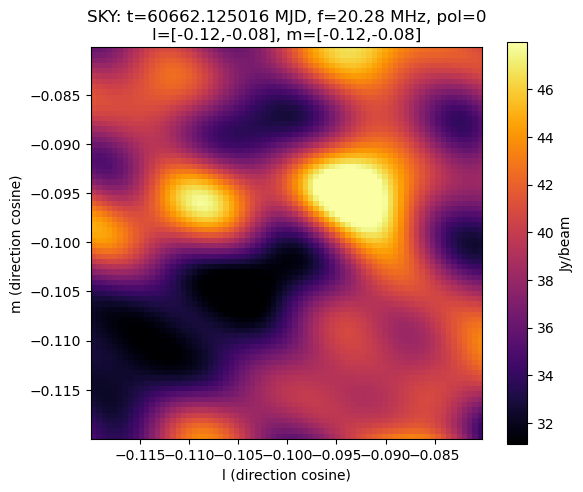

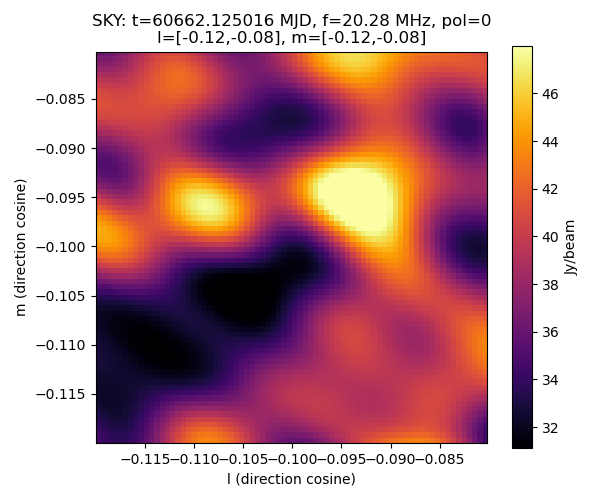

In [8]:
ds.radport.plot_cutout(-0.1, -0.1, 0.02, 0.02, 'SKY', 0, 0)

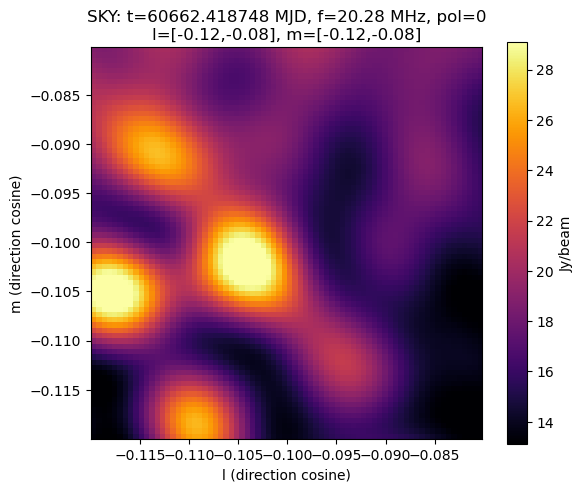

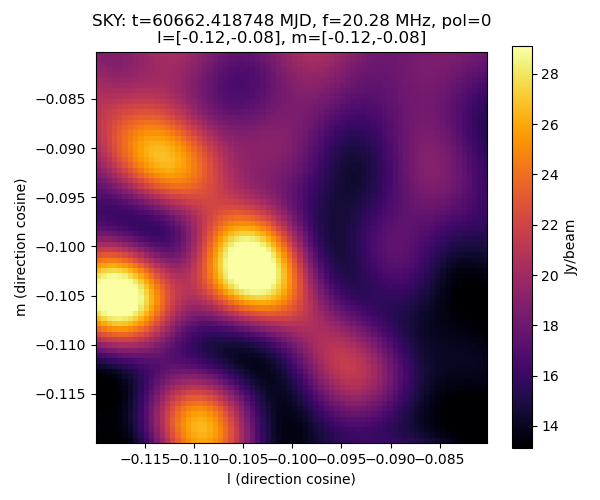

In [9]:
ds.radport.plot_cutout(-0.1, -0.1, 0.02, 0.02, 'SKY', 9, 0)

In [10]:
ds.radport.coords_to_pixel?

Signature: ds.radport.coords_to_pixel(ra: 'float', dec: 'float') -> 'tuple[int, int]'
Docstring:
Convert celestial coordinates (RA, Dec) to pixel indices.

Parameters
----------
ra : float
    Right Ascension in degrees.
dec : float
    Declination in degrees.

Returns
-------
tuple of int
    (l_idx, m_idx) pixel indices (rounded to nearest integer).

Raises
------
ValueError
    If WCS is not available or coordinates are outside the image.

Example
-------
>>> l_idx, m_idx = ds.radport.coords_to_pixel(180.0, 45.0)
File:      ~/anaconda3arm/envs/py312/lib/python3.12/site-packages/ovro_lwa_portal/accessor.py
Type:      method

In [11]:
ds.right_ascension[9,0,2048,2048].values


IndexError: too many indices

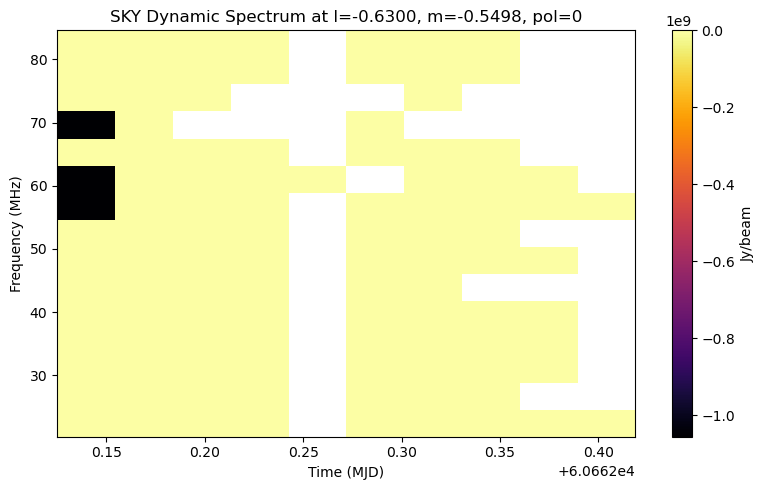

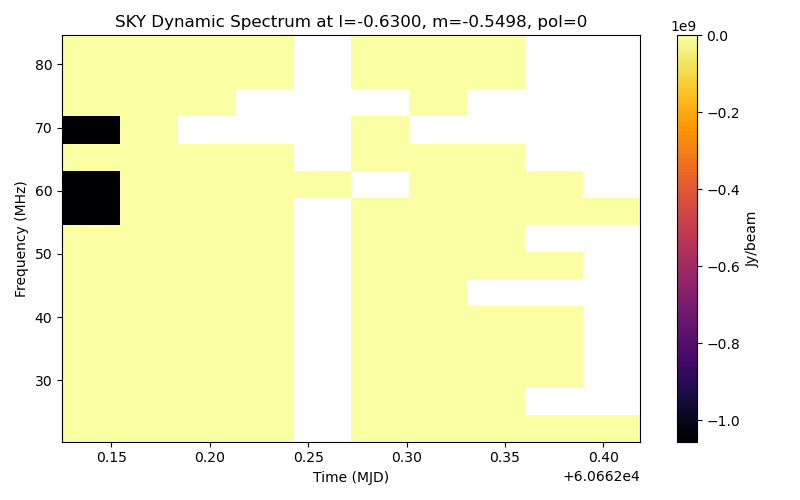

In [12]:
ds.radport.plot_dynamic_spectrum(-0.63, -0.55)

In [13]:
ds.radport.coords_to_pixel( 269.4462682627590, 4.768204473433690)

ValueError: cannot convert float NaN to integer

In [13]:
ds.radport.find_peaks(5, 5)

[{'l': 0.3196134192714616,
  'm': 0.7815802556587107,
  'l_idx': 1462,
  'm_idx': 3481,
  'flux': 2.5997421741485596,
  'snr': 11.797176633691924}]

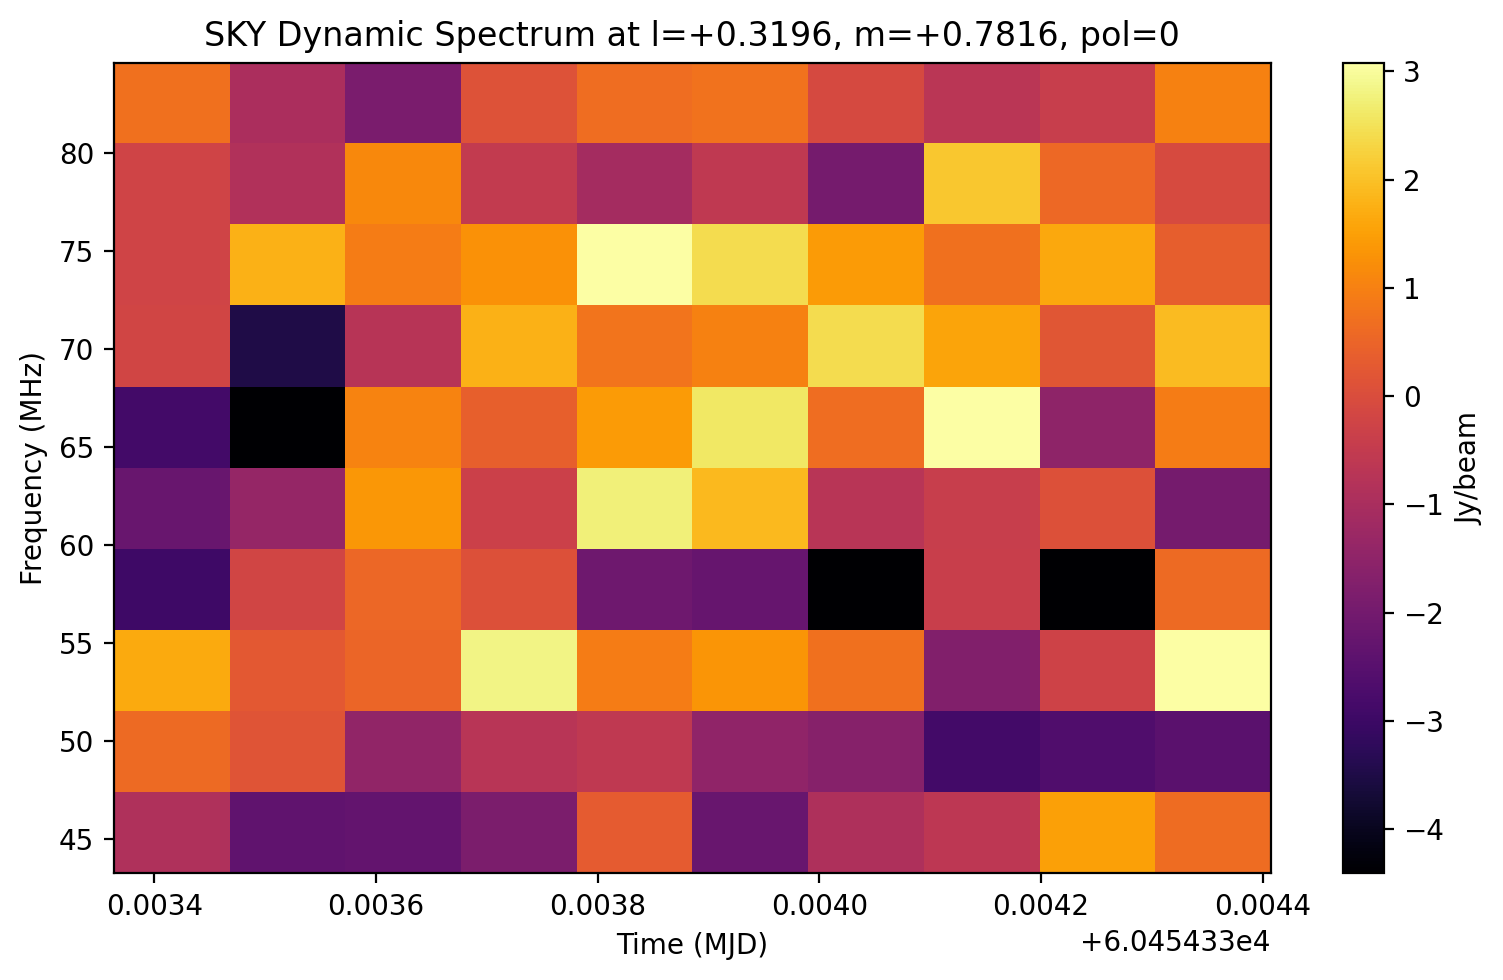

In [14]:
ds.radport.plot_dynamic_spectrum(0.3196134192714616, 0.78158)

In [15]:
from astropy.io import fits
from astropy import wcs

In [87]:
BMAJ, BMIN, BPA = np.degrees(ds.BEAM.values[0,0, 0].tolist())   # hack
freq = ds.frequency.values[0]

In [88]:
cards = []
for cstr in ds.wcs_header_str[0, 0].attrs['fits_wcs_header'].split('\n'):
    if 'END' in cstr:
        cards.append(fits.Card.fromstring(f'BMAJ = {BMAJ}'))
        cards.append(fits.Card.fromstring(f'BMIN = {BMIN}'))
        cards.append(fits.Card.fromstring(f'BPA = {BPA}'))
        cards.append(fits.Card.fromstring(f'FREQ = {freq}'))
        cards.append(fits.Card.fromstring('HISTORY = ""'))
    cards.append(fits.Card.fromstring(cstr))

In [89]:
hdr = fits.Header(cards=cards)
hdu = fits.ImageHDU(ds.SKY[0, 0, 0].values, header=hdr)
hdul = fits.HDUList(hdus=[hdu])

In [90]:
im = bdsf.process_image(hdul, thresh='hard')

--> Using pre-opened FITS HDUList
 [astropy.io.fits.verify]
Beam shape (major, minor, pos angle) .... : (1.00000e-01, 1.00000e-01, 47.4) degrees
Frequency of image ...................... : 43.246 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 81814.117 Jy
--> Calculating background rms and mean images
Derived rms_box (box size, step size) ... : (495, 165) pixels
--> Variation in rms image significant
--> Using 2D map for background rms
--> Variation in mean image significant
--> Using 2D map for background mean
Min/max values of background rms map .... : (1.68e+00, 4.43e+00) Jy/beam
Min/max values of background mean map ... : (-1.09e+00, 5.08e-01) Jy/beam
Minimum number of pixels per island ..... : 6
Number of islands found ................. : 951


Fitting islands with Gaussians .......... : [|] 0/951

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Fitting islands with Gaussians .......... : [/] 1/951

stty: 'standard input': Inappropriate ioctl for device


----

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [-] 2/951Fitting islands with Gaussians .......... : [-] 2/951

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


||

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Fitting islands with Gaussians .......... : [-] 2/951Fitting islands with Gaussians .......... : [-] 2/951

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


--Fitting islands with Gaussians .......... : [|] 4/951Fitting islands with Gaussians .......... : [|] 4/951Fitting islands with Gaussians .......... : [|] 4/951|||Fitting islands with Gaussians .......... : [-] 6/951Fitting islands with Gaussians .......... : [-] 6/951

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/

stty: 'standard input': Inappropriate ioctl for device


/Fitting islands with Gaussians .......... : [|] 8/951Fitting islands with Gaussians .......... : [|] 8/951Fitting islands with Gaussians .......... : [|] 8/951Fitting islands with Gaussians .......... : [/] 9/951

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\\\\Fitting islands with Gaussians .......... : [/] 9/951|

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input'

///Fitting islands with Gaussians .......... : [\] 11/951

: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [\] 11/951Fitting islands with Gaussians .......... : [\] 11/951Fitting islands with Gaussians .......... : [\] 11/951Fitting islands with Gaussians .......... : [|] 12/951|

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


||||Fitting islands with Gaussians .......... : [/] 13/951Fitting islands with Gaussians .......... : [/] 13/951Fitting islands with Gaussians .......... : [/] 13/951Fitting islands with Gaussians .......... : [|] 17/951Fitting islands with Gaussians .......... : [|] 17/951\Fitting islands with Gaussians .......... : [|] 17/951

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


||///Fitting islands with Gaussians .......... : [|] 17/951Fitting islands with Gaussians .......... : [|] 17/951Fitting islands with Gaussians .......... : [\] 19/951Fitting islands with Gaussians .......... : [/] 21/951

stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input''standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


||Fitting islands with Gaussians .......... : [/] 21/951Fitting islands with Gaussians .......... : [/] 21/951Fitting islands with Gaussians .......... : [|] 20/951Fitting islands with Gaussians .......... : [|] 20/951

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-|---Fitting islands with Gaussians .......... : [|] 24/951

stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [|] 24/951/--

stty: 'standard input'

-Fitting islands with Gaussians .......... : [-] 26/951Fitting islands with Gaussians .......... : [-] 26/951Fitting islands with Gaussians .......... : [-] 26/951-Fitting islands with Gaussians .......... : [|] 24/951Fitting islands with Gaussians .......... : [-] 26/951Fitting islands with Gaussians .......... : [/] 29/951\\\\

: Inappropriate ioctl for device
stty: 'standard input'stty: 'standard input': Inappropriate ioctl for device: Inappropriate ioctl for device

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\\\\Fitting islands with Gaussians .......... : [-] 30/951Fitting islands with Gaussians .......... : [-] 30/951Fitting islands with Gaussians .......... : [-] 30/951Fitting islands with Gaussians .......... : [-] 30/951Fitting islands with Gaussians .......... : [\] 36/951|Fitting islands with Gaussians .......... : [\] 36/951||Fitting islands with Gaussians .......... : [\] 36/951||/Fitting islands with Gaussians .......... : [\] 36/951/Fitting islands with Gaussians .......... : [\] 36/951Fitting islands with Gaussians .......... : [\] 36/951Fitting islands with Gaussians .......... : [\] 36/951

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [\] 36/951Fitting islands with Gaussians .......... : [|] 40/951Fitting islands with Gaussians .......... : [|] 40/951Fitting islands with Gaussians .......... : [|] 40/951Fitting islands with Gaussians .......... : [/] 41/951Fitting islands with Gaussians .......... : [|] 40/951Fitting islands with Gaussians .......... : [|] 40/951|-/-------Fitting islands with Gaussians .......... : [/] 41/951\Fitting islands with Gaussians .......... : [/] 48/951Fitting islands with Gaussians .......... : [-] 49/951

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input'stty: 'standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [|] 46/951Fitting islands with Gaussians .......... : [-] 49/951//Fitting islands with Gaussians .......... : [-] 49/951Fitting islands with Gaussians .......... : [-] 49/951/Fitting islands with Gaussians .......... : [-] 49/951/Fitting islands with Gaussians .......... : [\] 51/951Fitting islands with Gaussians .......... : [-] 49/951Fitting islands with Gaussians .......... : [-] 49/951Fitting islands with Gaussians .......... : [-] 49/951||

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Fitting islands with Gaussians .......... : [/] 53/951Fitting islands with Gaussians .......... : [/] 53/951Fitting islands with Gaussians .......... : [/] 53/951|/|Fitting islands with Gaussians .......... : [/] 53/951-Fitting islands with Gaussians .......... : [|] 56/951Fitting islands with Gaussians .......... : [|] 56/951\\

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\-|//Fitting islands with Gaussians .......... : [/] 57/951/Fitting islands with Gaussians .......... : [|] 56/951Fitting islands with Gaussians .......... : [|] 60/951Fitting islands with Gaussians .......... : [|] 56/951Fitting islands with Gaussians .......... : [-] 62/951//--Fitting islands with Gaussians .......... : [\] 64/951Fitting islands with Gaussians .......... : [\] 63/951Fitting islands with Gaussians .......... : [\] 64/951Fitting islands with Gaussians .......... : [/] 64/951Fitting islands with Gaussians .......... : [|] 64/951

stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input''standard input': Inappropriate ioctl for device: Inappropriate ioctl for device

stty: 'standard input'stty: : Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


//-Fitting islands with Gaussians .......... : [-] 62/951Fitting islands with Gaussians .......... : [-] 65/951Fitting islands with Gaussians .......... : [/] 64/951Fitting islands with Gaussians .......... : [/] 64/951Fitting islands with Gaussians .......... : [/] 64/951--Fitting islands with Gaussians .......... : [-] 65/951--Fitting islands with Gaussians .......... : [/] 64/951\

stty: 'standard input'stty: 'standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input'stty: 'standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [/] 69/951Fitting islands with Gaussians .......... : [/] 69/951Fitting islands with Gaussians .......... : [-] 69/951Fitting islands with Gaussians .......... : [-] 69/951Fitting islands with Gaussians .......... : [-] 69/951||/////////Fitting islands with Gaussians .......... : [-] 69/951Fitting islands with Gaussians .......... : [-] 69/951\|/Fitting islands with Gaussians .......... : [\] 74/951Fitting islands with Gaussians .......... : [|] 76/951

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [/] 78/951/-Fitting islands with Gaussians .......... : [/] 78/951Fitting islands with Gaussians .......... : [/] 78/951Fitting islands with Gaussians .......... : [/] 78/951Fitting islands with Gaussians .......... : [/] 78/951\Fitting islands with Gaussians .......... : [|] 76/951Fitting islands with Gaussians .......... : [/] 78/951Fitting islands with Gaussians .......... : [/] 78/951Fitting islands with Gaussians .......... : [/] 78/951/|////Fitting islands with Gaussians .......... : [/] 78/951

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input'stty: 'standard input': Inappropriate ioctl for device: Inappropriate ioctl for device

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [\] 84/951Fitting islands with Gaussians .......... : [/] 82/951/Fitting islands with Gaussians .......... : [-] 83/951Fitting islands with Gaussians .......... : [/] 78/951Fitting islands with Gaussians .......... : [\] 80/951Fitting islands with Gaussians .......... : [|] 81/951Fitting islands with Gaussians .......... : [/] 87/951|Fitting islands with Gaussians .......... : [/] 87/951Fitting islands with Gaussians .......... : [/] 87/951|/|//////\/

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Fitting islands with Gaussians .......... : [/] 87/951Fitting islands with Gaussians .......... : [/] 87/951Fitting islands with Gaussians .......... : [|] 92/951Fitting islands with Gaussians .......... : [/] 87/951Fitting islands with Gaussians .......... : [|] 87/951|Fitting islands with Gaussians .......... : [|] 92/951Fitting islands with Gaussians .......... : [/] 93/951Fitting islands with Gaussians .......... : [/] 94/951Fitting islands with Gaussians .......... : [/] 94/951Fitting islands with Gaussians .......... : [/] 94/951Fitting islands with Gaussians .......... : [|] 92/951Fitting islands with Gaussians .......... : [/] 94/951Fitting islands with Gaussians .......... : [/] 94/951Fitting islands with Gaussians .......... : [/] 94/951Fitting islands with Gaussians .......... : [/] 94/951|-||/////Fitting islands with Gaussians .......... : [|] 97/951Fitting islands with Gaussians .......... : [/] 94/951|Fitting islands with Gaussians .......... : [\] 93/951

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [|] 101/951Fitting islands with Gaussians .......... : [/] 101/951Fitting islands with Gaussians .......... : [/] 101/951|Fitting islands with Gaussians .......... : [/] 101/951Fitting islands with Gaussians .......... : [/] 101/951Fitting islands with Gaussians .......... : [|] 101/951Fitting islands with Gaussians .......... : [|] 101/951-/Fitting islands with Gaussians .......... : [-] 101/951||///-Fitting islands with Gaussians .......... : [|] 105/951----Fitting islands with Gaussians .......... : [/] 109/951-Fitting islands with Gaussians .......... : [|] 102/951-

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [-] 109/951Fitting islands with Gaussians .......... : [/] 101/951Fitting islands with Gaussians .......... : [|] 113/951Fitting islands with Gaussians .......... : [-] 113/951Fitting islands with Gaussians .......... : [/] 113/951Fitting islands with Gaussians .......... : [|] 112/951Fitting islands with Gaussians .......... : [-] 113/951Fitting islands with Gaussians .......... : [/] 113/951Fitting islands with Gaussians .......... : [-] 113/951Fitting islands with Gaussians .......... : [/] 113/951|/Fitting islands with Gaussians .......... : [-] 113/951///|/////

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input''standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [-] 113/951Fitting islands with Gaussians .......... : [-] 113/951Fitting islands with Gaussians .......... : [-] 113/951|////---/Fitting islands with Gaussians .......... : [|] 120/951Fitting islands with Gaussians .......... : [/] 121/951-Fitting islands with Gaussians .......... : [|] 121/951Fitting islands with Gaussians .......... : [/] 121/951Fitting islands with Gaussians .......... : [/] 121/951Fitting islands with Gaussians .......... : [/] 121/951Fitting islands with Gaussians .......... : [/] 121/951Fitting islands with Gaussians .......... : [/] 121/951Fitting islands with Gaussians .......... : [/] 121/951Fitting islands with Gaussians .......... : [/] 121/951

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input'stty: 'standard input': Inappropriate ioctl for device: Inappropriate ioctl for device

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

Fitting islands with Gaussians .......... : [/] 121/951-Fitting islands with Gaussians .......... : [-] 128/951Fitting islands with Gaussians .......... : [/] 127/951Fitting islands with Gaussians .......... : [|] 124/951Fitting islands with Gaussians .......... : [-] 128/951Fitting islands with Gaussians .......... : [/] 127/951Fitting islands with Gaussians .......... : [/] 127/951Fitting islands with Gaussians .......... : [-] 128/951Fitting islands with Gaussians .......... : [/] 126/951Fitting islands with Gaussians .......... : [-] 128/951

stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [/] 127/951Fitting islands with Gaussians .......... : [-] 128/951|--//////////////\\|Fitting islands with Gaussians .......... : [|] 135/951Fitting islands with Gaussians .......... : [-] 135/951Fitting islands with Gaussians .......... : [-] 134/951Fitting islands with Gaussians .......... : [/] 135/951

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input'stty: 'standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input'stty: 'standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input''standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

Fitting islands with Gaussians .......... : [/] 135/951Fitting islands with Gaussians .......... : [/] 135/951Fitting islands with Gaussians .......... : [/] 135/951Fitting islands with Gaussians .......... : [/] 135/951Fitting islands with Gaussians .......... : [/] 135/951/Fitting islands with Gaussians .......... : [/] 135/951Fitting islands with Gaussians .......... : [/] 135/951Fitting islands with Gaussians .......... : [/] 135/951Fitting islands with Gaussians .......... : [/] 135/951Fitting islands with Gaussians .......... : [/] 135/951Fitting islands with Gaussians .......... : [/] 135/951Fitting islands with Gaussians .......... : [\] 137/951Fitting islands with Gaussians .......... : [|] 138/951Fitting islands with Gaussians .......... : [/] 135/951\Fitting islands with Gaussians .......... : [\] 137/951Fitting islands with Gaussians .......... : [/] 135/951/\\\\\\Fitting islands with Gaussians .......... : [/] 140/951\\\-Fitting islands with Gaussians .......... : [\] 142/

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input''standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [/] 144/951Fitting islands with Gaussians .......... : [\] 146/951-|--Fitting islands with Gaussians .......... : [\] 146/951Fitting islands with Gaussians .......... : [\] 146/951||||//Fitting islands with Gaussians .......... : [\] 146/951\Fitting islands with Gaussians .......... : [\] 146/951

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input'stty: 'standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input'stty: 'standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


||/Fitting islands with Gaussians .......... : [\] 146/951Fitting islands with Gaussians .......... : [\] 146/951Fitting islands with Gaussians .......... : [-] 145/951Fitting islands with Gaussians .......... : [\] 146/951Fitting islands with Gaussians .......... : [-] 151/951Fitting islands with Gaussians .......... : [\] 146/951Fitting islands with Gaussians .......... : [-] 151/951Fitting islands with Gaussians .......... : [-] 151/951

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input'stty: 'standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


///|||||Fitting islands with Gaussians .......... : [|] 153/951Fitting islands with Gaussians .......... : [|] 153/951Fitting islands with Gaussians .......... : [|] 153/951Fitting islands with Gaussians .......... : [|] 154/951Fitting islands with Gaussians .......... : [|] 153/951Fitting islands with Gaussians .......... : [/] 154/951Fitting islands with Gaussians .......... : [\] 152/951Fitting islands with Gaussians .......... : [|] 153/951Fitting islands with Gaussians .......... : [/] 154/951||Fitting islands with Gaussians .......... : [|] 153/951Fitting islands with Gaussians .......... : [/] 154/951|

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input''standard input': Inappropriate ioctl for device: Inappropriate ioctl for device

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


///Fitting islands with Gaussians .......... : [/] 160/951Fitting islands with Gaussians .......... : [/] 158/951Fitting islands with Gaussians .......... : [|] 158/951Fitting islands with Gaussians .......... : [|] 158/951Fitting islands with Gaussians .......... : [|] 158/951Fitting islands with Gaussians .......... : [/] 159/951Fitting islands with Gaussians .......... : [|] 158/951-Fitting islands with Gaussians .......... : [|] 158/951Fitting islands with Gaussians .......... : [|] 158/951Fitting islands with Gaussians .......... : [|] 158/951Fitting islands with Gaussians .......... : [|] 158/951\

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input'stty: 'standard input': Inappropriate ioctl

Fitting islands with Gaussians .......... : [/] 160/951Fitting islands with Gaussians .......... : [/] 160/951|-/\\/|////////Fitting islands with Gaussians .......... : [-] 164/951Fitting islands with Gaussians .......... : [/] 160/951Fitting islands with Gaussians .......... : [\] 165/951/Fitting islands with Gaussians .......... : [|] 165/951Fitting islands with Gaussians .......... : [/] 167/951

stty: 'standard input'

Fitting islands with Gaussians .......... : [/] 170/951Fitting islands with Gaussians .......... : [\] 168/951Fitting islands with Gaussians .......... : [-] 168/951Fitting islands with Gaussians .......... : [\] 168/951Fitting islands with Gaussians .......... : [/] 170/951Fitting islands with Gaussians .......... : [/] 170/951Fitting islands with Gaussians .......... : [/] 170/951Fitting islands with Gaussians .......... : [/] 170/951Fitting islands with Gaussians .......... : [/] 170/951-Fitting islands with Gaussians .......... : [/] 170/951\Fitting islands with Gaussians .......... : [/] 166/951\/Fitting islands with Gaussians .......... : [|] 170/951|///////Fitting islands with Gaussians .......... : [/] 170/951Fitting islands with Gaussians .......... : [/] 173/951-Fitting islands with Gaussians .......... : [-] 174/951Fitting islands with Gaussians .......... : [/] 176/951Fitting islands with Gaussians .......... : [|] 176/951Fitting islands with Gaussians .......... : [\] 174/

: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input''standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/--//--

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input'stty: 'standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-----

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [/] 182/951Fitting islands with Gaussians .......... : [/] 181/951Fitting islands with Gaussians .......... : [-] 182/951

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input''standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input'stty: 'standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-/Fitting islands with Gaussians .......... : [-] 182/951Fitting islands with Gaussians .......... : [\] 175/951Fitting islands with Gaussians .......... : [/] 176/951

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Fitting islands with Gaussians .......... : [|] 183/951

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


////--Fitting islands with Gaussians .......... : [/] 185/951Fitting islands with Gaussians .......... : [-] 185/951Fitting islands with Gaussians .......... : [-] 185/951Fitting islands with Gaussians .......... : [/] 184/951

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [/] 189/951Fitting islands with Gaussians .......... : [-] 185/951Fitting islands with Gaussians .......... : [/] 184/951-Fitting islands with Gaussians .......... : [-] 185/951\Fitting islands with Gaussians .......... : [-] 185/951Fitting islands with Gaussians .......... : [|] 184/951

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input'stty: 'standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

Fitting islands with Gaussians .......... : [-] 185/951Fitting islands with Gaussians .......... : [-] 185/951Fitting islands with Gaussians .......... : [-] 185/951Fitting islands with Gaussians .......... : [-] 177/951Fitting islands with Gaussians .......... : [/] 190/951

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [-] 185/951

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


||Fitting islands with Gaussians .......... : [-] 185/951

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [/] 194/951

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [/] 194/951Fitting islands with Gaussians .......... : [/] 190/951Fitting islands with Gaussians .......... : [-] 195/951Fitting islands with Gaussians .......... : [-] 195/951Fitting islands with Gaussians .......... : [/] 194/951///||///////Fitting islands with Gaussians .......... : [-] 195/951Fitting islands with Gaussians .......... : [\] 196/951Fitting islands with Gaussians .......... : [|] 197/951Fitting islands with Gaussians .......... : [|] 197/951|--\\

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input'stty: 'standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input'stty: 'standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'sta

||||||Fitting islands with Gaussians .......... : [/] 202/951Fitting islands with Gaussians .......... : [|] 202/951Fitting islands with Gaussians .......... : [/] 202/951Fitting islands with Gaussians .......... : [/] 203/951Fitting islands with Gaussians .......... : [/] 202/951Fitting islands with Gaussians .......... : [/] 203/951

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [/] 203/951Fitting islands with Gaussians .......... : [|] 203/951Fitting islands with Gaussians .......... : [/] 203/951//Fitting islands with Gaussians .......... : [/] 203/951Fitting islands with Gaussians .......... : [/] 203/951

stty: stty: 'standard input''standard input': Inappropriate ioctl for device: Inappropriate ioctl for device

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Fitting islands with Gaussians .......... : [-] 208/951Fitting islands with Gaussians .......... : [\] 208/951Fitting islands with Gaussians .......... : [|] 206/951Fitting islands with Gaussians .......... : [/] 203/951Fitting islands with Gaussians .......... : [-] 208/951Fitting islands with Gaussians .......... : [\] 209/951Fitting islands with Gaussians .......... : [|] 210/951||Fitting islands with Gaussians .......... : [|] 210/951Fitting islands with Gaussians .......... : [|] 210/951Fitting islands with Gaussians .......... : [|] 210/951Fitting islands with Gaussians .......... : [|] 210/951Fitting islands with Gaussians .......... : [|] 210/951Fitting islands with Gaussians .......... : [/] 212/951Fitting islands with Gaussians .......... : [/] 212/951Fitting islands with Gaussians .......... : [-] 212/951//\/||/||||//|/|///

: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


//Fitting islands with Gaussians .......... : [|] 210/951Fitting islands with Gaussians .......... : [|] 210/951|||

stty: 'standard input'

|||Fitting islands with Gaussians .......... : [/] 216/951Fitting islands with Gaussians .......... : [/] 215/951Fitting islands with Gaussians .......... : [/] 218/951Fitting islands with Gaussians .......... : [\] 217/951/Fitting islands with Gaussians .......... : [|] 218/951/Fitting islands with Gaussians .......... : [|] 218/951Fitting islands with Gaussians .......... : [|] 218/951Fitting islands with Gaussians .......... : [|] 219/951Fitting islands with Gaussians .......... : [|] 219/951Fitting islands with Gaussians .......... : [|] 216/951Fitting islands with Gaussians .......... : [/] 219/951Fitting islands with Gaussians .......... : [|] 219/951Fitting islands with Gaussians .......... : [/] 219/951Fitting islands with Gaussians .......... : [/] 218/951Fitting islands with Gaussians .......... : [|] 219/951Fitting islands with Gaussians .......... : [/] 219/951Fitting islands with Gaussians .......... : [/] 219/951Fitting islands with Gaussians .......... : [/] 219/951\\\Fi

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input'stty: 'standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input'stty: 'standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty

Fitting islands with Gaussians .......... : [\] 269/951Fitting islands with Gaussians .......... : [\] 269/951Fitting islands with Gaussians .......... : [/] 267/951Fitting islands with Gaussians .......... : [/] 272/951\Fitting islands with Gaussians .......... : [\] 274/951Fitting islands with Gaussians .......... : [-] 268/951|-Fitting islands with Gaussians .......... : [|] 275/951Fitting islands with Gaussians .......... : [-] 276/951\\Fitting islands with Gaussians .......... : [\] 276/951Fitting islands with Gaussians .......... : [\] 277/951\\\\Fitting islands with Gaussians .......... : [\] 276/951||Fitting islands with Gaussians .......... : [\] 277/951Fitting islands with Gaussians .......... : [\] 276/951\||Fitting islands with Gaussians .......... : [\] 275/951/Fitting islands with Gaussians .......... : [|] 277/951/Fitting islands with Gaussians .......... : [|] 277/951|/Fitting islands with Gaussians .......... : [\] 276/951Fitting islands with Gaussians .......... : [|]

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

|-Fitting islands with Gaussians .......... : [-] 281/951

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [|] 281/951||-Fitting islands with Gaussians .......... : [|] 283/951/

stty: 'standard input'

Fitting islands with Gaussians .......... : [|] 285/951\-\Fitting islands with Gaussians .......... : [-] 285/951Fitting islands with Gaussians .......... : [/] 285/951--\|Fitting islands with Gaussians .......... : [\] 284/951|Fitting islands with Gaussians .......... : [-] 285/951|Fitting islands with Gaussians .......... : [\] 286/951|||Fitting islands with Gaussians .......... : [\] 286/951|Fitting islands with Gaussians .......... : [|] 285/951Fitting islands with Gaussians .......... : [-] 284/951Fitting islands with Gaussians .......... : [|] 285/951Fitting islands with Gaussians .......... : [|] 285/951Fitting islands with Gaussians .......... : [|] 285/951Fitting islands with Gaussians .......... : [|] 285/951Fitting islands with Gaussians .......... : [|] 285/951Fitting islands with Gaussians .......... : [|] 284/951Fitting islands with Gaussians .......... : [-] 284/951/|//--/Fitting islands with Gaussians .......... : [/] 286/951Fitting islands with Gaussians .......... : [

stty: 'standard input'

Fitting islands with Gaussians .......... : [|] 299/951|Fitting islands with Gaussians .......... : [|] 299/951////Fitting islands with Gaussians .......... : [|] 299/951/-\\Fitting islands with Gaussians .......... : [|] 299/951Fitting islands with Gaussians .......... : [/] 300/951Fitting islands with Gaussians .......... : [/] 300/951\Fitting islands with Gaussians .......... : [/] 300/951Fitting islands with Gaussians .......... : [/] 300/951Fitting islands with Gaussians .......... : [/] 299/951Fitting islands with Gaussians .......... : [-] 299/951|||Fitting islands with Gaussians .......... : [\] 301/951/Fitting islands with Gaussians .......... : [\] 302/951Fitting islands with Gaussians .......... : [\] 301/951-|-Fitting islands with Gaussians .......... : [|] 302/951Fitting islands with Gaussians .......... : [|] 302/951Fitting islands with Gaussians .......... : [/] 302/951Fitting islands with Gaussians .......... : [|] 302/951Fitting islands with Gaussians .......... : [-] 

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

|||-|Fitting islands with Gaussians .......... : [|] 305/951Fitting islands with Gaussians .......... : [\] 307/951Fitting islands with Gaussians .......... : [-] 305/951Fitting islands with Gaussians .......... : [-] 306/951//|/Fitting islands with Gaussians .......... : [|] 309/951Fitting islands with Gaussians .......... : [|] 307/951Fitting islands with Gaussians .......... : [|] 305/951Fitting islands with Gaussians .......... : [-] 305/951Fitting islands with Gaussians .......... : [|] 309/951|Fitting islands with Gaussians .......... : [/] 308/951

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [/] 308/951Fitting islands with Gaussians .......... : [|] 308/951Fitting islands with Gaussians .......... : [/] 309/951||Fitting islands with Gaussians .......... : [|] 308/951Fitting islands with Gaussians .......... : [|] 310/951Fitting islands with Gaussians .......... : [|] 310/951|//

stty: 'standard input'

Fitting islands with Gaussians .......... : [|] 308/951|/Fitting islands with Gaussians .......... : [/] 310/951Fitting islands with Gaussians .......... : [/] 310/951|||-Fitting islands with Gaussians .......... : [/] 311/951Fitting islands with Gaussians .......... : [|] 311/951Fitting islands with Gaussians .......... : [|] 311/951Fitting islands with Gaussians .......... : [|] 309/951|||Fitting islands with Gaussians .......... : [|] 309/951

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [-] 309/951Fitting islands with Gaussians .......... : [|] 312/951|Fitting islands with Gaussians .......... : [|] 312/951Fitting islands with Gaussians .......... : [|] 312/951/-//Fitting islands with Gaussians .......... : [|] 313/951//-----Fitting islands with Gaussians .......... : [/] 314/951\Fitting islands with Gaussians .......... : [-] 314/951Fitting islands with Gaussians .......... : [/] 314/951-Fitting islands with Gaussians .......... : [/] 314/951Fitting islands with Gaussians .......... : [-] 316/951Fitting islands with Gaussians .......... : [/] 314/951Fitting islands with Gaussians .......... : [/] 314/951Fitting islands with Gaussians .......... : [-] 315/951\Fitting islands with Gaussians .......... : [-] 315/951||\Fitting islands with Gaussians .......... : [-] 315/951Fitting islands with Gaussians .......... : [-] 316/951|Fitting islands with Gaussians .......... : [\] 315/951Fitting islands with Gaussians .......... : [-

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

Fitting islands with Gaussians .......... : [/] 322/951//Fitting islands with Gaussians .......... : [|] 324/951Fitting islands with Gaussians .......... : [|] 323/951-Fitting islands with Gaussians .......... : [|] 323/951Fitting islands with Gaussians .......... : [|] 324/951Fitting islands with Gaussians .......... : [|] 324/951Fitting islands with Gaussians .......... : [|] 323/951Fitting islands with Gaussians .......... : [|] 323/951Fitting islands with Gaussians .......... : [|] 323/951Fitting islands with Gaussians .......... : [|] 323/951Fitting islands with Gaussians .......... : [|] 324/951Fitting islands with Gaussians .......... : [|] 323/951Fitting islands with Gaussians .......... : [/] 327/951Fitting islands with Gaussians .......... : [/] 327/951Fitting islands with Gaussians .......... : [-] 327/951\\\\||Fitting islands with Gaussians .......... : [\] 330/951|/Fitting islands with Gaussians .......... : [\] 331/951\Fitting islands with Gaussians .......... : [\] 330/9

: Inappropriate ioctl for device


-Fitting islands with Gaussians .......... : [/] 337/951-Fitting islands with Gaussians .......... : [/] 339/951-Fitting islands with Gaussians .......... : [-] 339/951-||/Fitting islands with Gaussians .......... : [-] 340/951Fitting islands with Gaussians .......... : [-] 340/951Fitting islands with Gaussians .......... : [-] 340/951Fitting islands with Gaussians .......... : [|] 340/951Fitting islands with Gaussians .......... : [|] 340/951Fitting islands with Gaussians .......... : [/] 340/951

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input''standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

|////Fitting islands with Gaussians .......... : [|] 341/951//-

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/\\-Fitting islands with Gaussians .......... : [/] 341/951Fitting islands with Gaussians .......... : [/] 341/951Fitting islands with Gaussians .......... : [/] 342/951Fitting islands with Gaussians .......... : [/] 342/951Fitting islands with Gaussians .......... : [/] 341/951Fitting islands with Gaussians .......... : [-] 341/951Fitting islands with Gaussians .......... : [/] 342/951Fitting islands with Gaussians .......... : [/] 342/951Fitting islands with Gaussians .......... : [\] 343/951Fitting islands with Gaussians .......... : [-] 342/951Fitting islands with Gaussians .......... : [\] 342/951||||Fitting islands with Gaussians .......... : [|] 343/951-/Fitting islands with Gaussians .......... : [|] 345/951Fitting islands with Gaussians .......... : [|] 344/951-Fitting islands with Gaussians .......... : [|] 343/951-Fitting islands with Gaussians .......... : [-] 345/951\Fitting islands with Gaussians .......... : [/] 346/951\Fitting islands with Gaussians .......... : [-] 346

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



/Fitting islands with Gaussians .......... : [/] 505/951Fitting islands with Gaussians .......... : [] 951/951[-8G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Total number of Gaussians fit to image .. : 995
Total flux density in model ............. : 135963.684 Jy
stty: 'standard input'--> Grouping Gaussians into sources
: Inappropriate ioctl for device
Number of sources formed from Gaussians   : 952
    Island #1 (x=233, y=2314): fit with 1 Gaussian with flag = 256
    Island #8 (x=431, y=2966): fit with 1 Gaussian with flag = 256
    Island #20 (x=638, y=1234): fit with 1 Gaussian with flag = 320
    Island #23 (x=655, y=1205): fit with 2 Gaussians with flags = 320, 64
    Island #34 (x=793, y=1089): fit with 1 Gaussian with flag = 64
    Island #39 (x=821, y=1093): fit with 1 Gaussian with flag = 256
    Island #42 (x=824, y=1059): fit with 1 Gaussian with flag = 256
    Island #46 (x=838, y=1805): fit with 1 Gaussian with flag = 256
    Island #48 (x=853, y=2898): fit with 1 Gaussian with flag = 256
    Island #60 (x=906, y=3519): fit with 1 Gaussian with flag = 256
    Island #62 (x=915, y=3501): fit with 3 Gaussians with flags = 256, 1

In [94]:
fluxes = [is0.total_flux for is0 in im.islands]

In [95]:
sorted(fluxes)

[np.float32(-36.54233),
 np.float32(-31.396807),
 np.float32(-8.835311),
 np.float32(1.4515212),
 np.float32(2.4198506),
 np.float32(14.845643),
 np.float32(20.384993),
 np.float32(20.617731),
 np.float32(21.308386),
 np.float32(24.71537),
 np.float32(25.132107),
 np.float32(25.551525),
 np.float32(27.425795),
 np.float32(28.06335),
 np.float32(28.404314),
 np.float32(28.884583),
 np.float32(29.154953),
 np.float32(29.655613),
 np.float32(29.78044),
 np.float32(30.01153),
 np.float32(30.236567),
 np.float32(30.270578),
 np.float32(30.938671),
 np.float32(31.45376),
 np.float32(32.525047),
 np.float32(32.533882),
 np.float32(32.551243),
 np.float32(32.57648),
 np.float32(32.650043),
 np.float32(32.946228),
 np.float32(33.251495),
 np.float32(33.68137),
 np.float32(33.682262),
 np.float32(33.861877),
 np.float32(34.251377),
 np.float32(34.49726),
 np.float32(34.608337),
 np.float32(35.047287),
 np.float32(35.229443),
 np.float32(35.339977),
 np.float32(35.34947),
 np.float32(35.377132),
